<a href="https://colab.research.google.com/github/Toms201/ISYS2001-Assignment2/blob/main/ISYS2001_Assignment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISYS2001 ENRON EMAIL ANALYSIS ASSIGNMENT

---


### Assesment Two - Notebooks as Business Reports
### Tom Sargent 20594567
#### Curtin University Bentley Campus S1 2022

<font color='red'>Please run the notebook scripts in order as the report is read to ensure correct data filtering and graph generation</font> 





#Executive Summary
This report analyses the Enron Email Dataset presented to the Federal District Court of America in 2006 from Email data collected between 1999 to 2003. The report begins by exploring the Email traffic by date, including the volume of emails sent by each date graphed visibly as well as listing the top 5 dates of emails. Following this, the top 5 email acocunts/users is explored in a bar graph as well as in table format to highlight the 5 msot active email accounts within the organisation.

From the analysis of this data, key factors relating to the Enron corporate fraud can be explored including what employees may have been involved in the fraud based on their email traffic, and on what days could ahve the fraud possibly been at the highest in the company.

This report has been produced using Python code to analyse the dataset, in conjunction with SQL.

# Introduction
Enron Corporation, a significant energy, commodities, and services firm established in the United States, was discovered in early 2004 for fraud, less than 30 years after its launch in 1985 (Segal, 2021). Enron's leadership deceived authorities by employing special purpose vehicles (SPVs) and special purpose entities (SPEs) to disguise its mountains of debt and hazardous assets from investors and creditors (Segal, 2021). 

The Enron Corporation narrative illustrates a firm that rose to industry leading heights only to plummet. Thousands of employees were impacted by the fated company's demise, which shocked Wall Street to its core. Enron's stock peaked at $ $90.75, and it was trading at $0.26 immediately before declaring bankruptcy on December 2, 2001 (Charge Banking. 2020).

This Business Reprot aims at determining the Top Emailers at Enron during the time of question between 1990 and 2002, as well as the dates with the highest email volume within the company using Python Analysis. From the released dataset of Enron company (Enron. 2015) email traffic we can analysse email frequency and occuraces to depict a narrative of the communication within the Company.

# Analysis

Within the report, we begin by analaysing the raw database of Enron related communications over the given data period so that we are able to determine key discussion factors.

To analyse the Enron dataset we must first download the given hosted dataset into the Notebook Instance

##Setup Code

In [29]:
#Exception Handling with the Try/Except Method
try:
  #Run the !wget function to download the database from the hosted platform. Save the database as enron.db in the colab instance machines files.
  ## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
  !wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
  print("Data Installed Successfully!")
except:
  print("Hmmm We had troubble downloading the Enron Dataset, Maybe try again?")

--2022-05-25 10:37:10--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-25 10:37:11--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  63.4MB/s    in 20s     

2022-05-25 10:37:31 (41.5 MB/s) - ‘enron.db’ saved [853819392/853819392]

Data Ins

There are multiple ways that the datset can be analyses - By using SQL qurieies within python to filter and sort data, or by using the Pandas module for data analsyis. In this report I have chosen to include both.

We begin by importing SQLite 3 for SQL analysis within Python. Following this I will also import Pandas (with an alias pd) and NumPy for calculations.

In [30]:
#Import all packages required for the data analysis
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
!pip install squarify  # pip install squarify (algorithm for treemap)
import squarify

#connect sqlite to database that has been created enron.db
## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
conn = sqlite3.connect("enron.db")

#Create a cursor (A row/column 'scanner')
cur = conn.cursor()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To test that the import of the data was correct, and that the import of the sqlite3 module was sucessfull, I ran the following cell to check the avaliable tables.

In [31]:
# Using SQL display the Name of a Table within the database
## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

## Analysing Email Traffic By Address
Now that the database has been established, and relevant analysis packages imported, we can begin analysing the raw Database

To begin, I thought it would be ideal to identify the data that would be required to find:

> Who are the top 10 emailers of the organisation.

For this we need to locate
1. The table that contains the record of all messages sent/recivied.
2. The Emails that messages are sent from/recieve messages.
3. A count of the occurances of email adresses by entry.

For this I decided to use Pandas to load the data into a dataframe

In [32]:
# Select all data from the table 'messages' using SQL
sql='''
SELECT * from message;
'''
# Load the data into a DataFrame names dfmessages
dfmessages = pd.read_sql_query(sql, conn)
dfmessages

#Count 10 times (for top 10)
n = 10

#In the dataframe dfmessages find the top count of values in the sender column and complete 'n' times
## REF: https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
dfmessages['sender'].value_counts().index.tolist()[:n]

['jeff.dasovich@enron.com',
 'j.kaminski@enron.com',
 'kay.mann@enron.com',
 'sara.shackleton@enron.com',
 'tana.jones@enron.com',
 'chris.germany@enron.com',
 'no.address@enron.com',
 'enron.announcements@enron.com',
 'matthew.lenhart@enron.com',
 'debra.perlingiere@enron.com']

Now we can confirm that the above emails are the top 10 emailers of the organisation, however, the data does not display how many emails each send.

In [33]:
# in the datataframe defined, within the column 'sender' count the top 10 occurances
## Ref: https://mode.com/python-tutorial/counting-and-plotting-in-python/
dfmessages['sender'].value_counts()[:10]

jeff.dasovich@enron.com          6273
j.kaminski@enron.com             5838
kay.mann@enron.com               5100
sara.shackleton@enron.com        4797
tana.jones@enron.com             4437
chris.germany@enron.com          3686
no.address@enron.com             3511
enron.announcements@enron.com    2838
matthew.lenhart@enron.com        2784
debra.perlingiere@enron.com      2549
Name: sender, dtype: int64

Now that a list exists, and the corect data can be confirmed, we need to create a plot that can be included in the discussion. Using the 'barh' style of graph we can easially see the y axis labels horizontially, rather than having to rotate x axis emails.

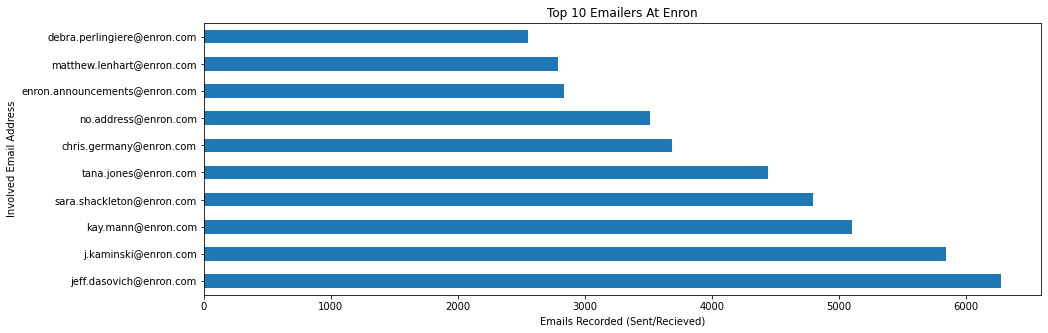

In [34]:
# As a bar histogram, plot the top 10 occurances in the sender column of the dfmessages dataframe
## Ref: https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe
dfmessages['sender'].value_counts()[:10].plot(kind='barh')
# Change x-axis label to "Emails Recorded (Sent/Recieved)"
plt.xlabel("Emails Recorded (Sent/Recieved)")
# Change y-axis label to "Involved Email Address"
plt.ylabel("Involved Email Address")
# Change the Plot title to "Top 10 Emailers At Enron"
plt.title("Top 10 Emailers At Enron")
# Save the plot as a png so it can be called later in the report
plt.savefig('emailers1.png', dpi=200, bbox_inches='tight')

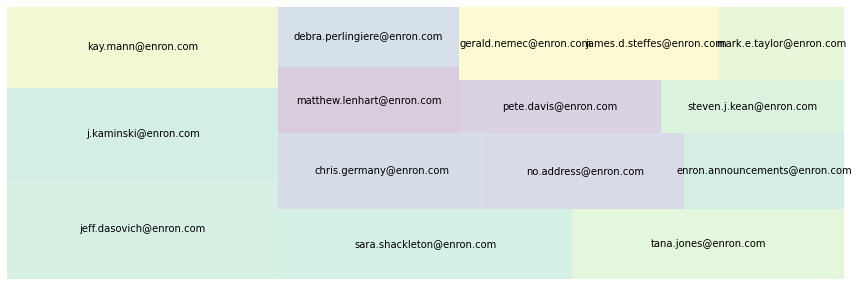

In [35]:
#Make a Pandas dataframe for the exact data to use in the Treemap. Top 15 Emailers.
dftreemap = dfmessages['sender'].value_counts().rename_axis("Sender").reset_index(name='Count')
dftreemap = dftreemap.head(n=15)

#Define the treemap parameters, data, axis.
## Ref: https://www.python-graph-gallery.com/treemap/
plt.rcParams['figure.figsize'] = [15, 5]
squarify.plot(sizes=dftreemap['Count'], label=dftreemap['Sender'], alpha=0.2 )
plt.axis('off')
plt.show()

## Analysing Email traffic By Date
Following analysing the email adresses which sent and recieved the most emails from Enron, we must now investigate the dates which had the most email traffic, sent or recived.

In [36]:
#Create a dataframe in Pandas from the messages table isolated by SQL previousley
df = pd.DataFrame(dfmessages)
# Define a start an end date for the period of analysis
## Ref: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
start_date = '1999-01-01'
end_date = '2003-01-01'
# Select DataFrame rows between two dates
mask = (dfmessages['date'] > start_date) & (dfmessages['date'] <= end_date)
dftime = df.loc[mask]
# Print/Display df2 to check the date filter has worked.
dftime

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [37]:
# In df2, create a new column called 'date_new' and convert the content of 'date' top Pandas datetime
dftime['date_new'] = pd.to_datetime(dftime['date'])
# Using pandad datetime function, convert the contents of 'date_new' to date format only
#Ref: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
dftime['date_new'] = dftime['date_new'].dt.date
dftime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mid,sender,date,message_id,subject,body,folder,date_new
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases,2000-01-21
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases,2000-01-24
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases,2000-01-24
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases,2000-02-02
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases,2000-02-07
...,...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox",2002-02-06
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox",2002-02-06
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox",2002-02-06
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox",2002-02-07


In [38]:
#Count the quantity of matching values in the dataframe column 'date_new' and assign to new dataframe
##Ref: https://mode.com/python-tutorial/counting-and-plotting-in-python/
dfdatecount = dftime['date_new'].value_counts()
dfdatecount


2001-10-25    2207
2001-10-29    2180
2001-11-27    2045
2001-11-26    2031
2001-10-22    2025
              ... 
1999-08-14       1
1999-05-07       1
2002-04-28       1
1999-04-02       1
1999-02-27       1
Name: date_new, Length: 1178, dtype: int64

In [39]:
# Rename the columns and reset the index to create a new dataframe with just the required date for the plot
dfdatecount = dftime['date_new'].value_counts().rename_axis("Dates").reset_index(name='Count')
# Sort values by Date
## Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
dfdatecount = dfdatecount.sort_values("Dates")
print (dfdatecount)

           Dates  Count
1072  1999-01-04      3
1116  1999-01-05      2
1115  1999-01-06      2
1087  1999-01-07      3
1051  1999-01-08      4
...          ...    ...
1034  2002-07-12      5
1149  2002-09-18      1
1117  2002-09-22      2
1153  2002-10-09      1
1152  2002-12-21      1

[1178 rows x 2 columns]


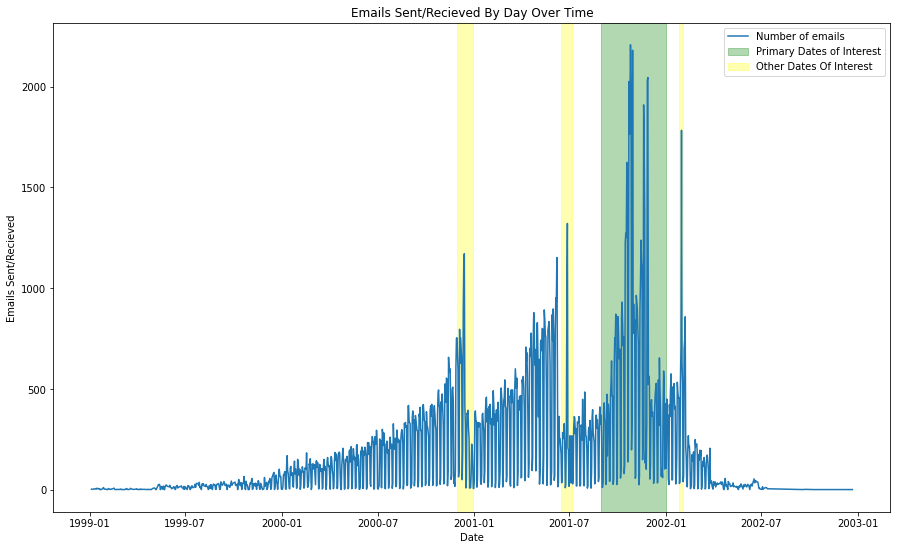

In [85]:
from datetime import datetime
from matplotlib.dates import date2num
#Using the MatplotLib Library create a bar graph with size 15,9
## Ref: https://www.w3schools.com/python/pandas/pandas_plotting.asp
fig, ax = plt.subplots(figsize=(15, 9))
ax.axvspan(date2num(datetime(2001,8,30)), date2num(datetime(2002,1,1)), 
           label="Point Of Interest",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2000,11,30)), date2num(datetime(2000,12,30)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
ax.axvspan(date2num(datetime(2001,6,15)), date2num(datetime(2001,7,5)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
ax.axvspan(date2num(datetime(2002,1,25)), date2num(datetime(2002,2,1)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
#Plot Dates on x-axis and Count on y-axis
ax.plot(dfdatecount['Dates'], dfdatecount['Count']);
#Define the x/y labels
plt.xlabel('Date')
plt.ylabel('Emails Sent/Recieved')
plt.legend(['Number of emails', 'Primary Dates of Interest' ,'Other Dates Of Interest'])
#Add a title
plt.title('Emails Sent/Recieved By Day Over Time')
#Save the plot to a png so it can be recalled in the report analysis
## Ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
plt.savefig('datetimeseries.png', dpi=200)

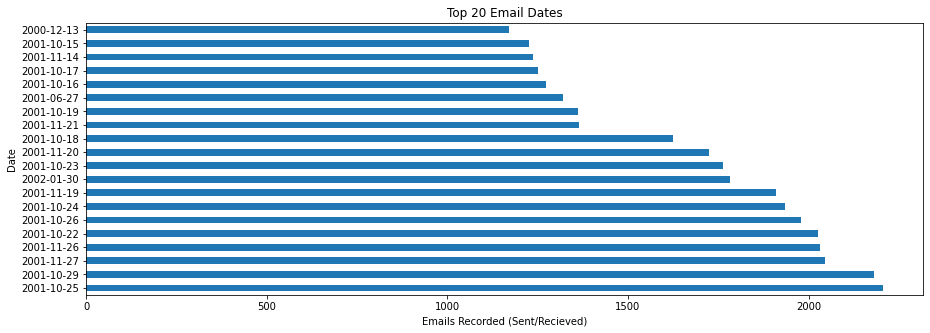

In [41]:
# As a bar histogram, plot the top 10 occurances in the sender column of the dfmessages dataframe
## Ref: https://www.w3schools.com/python/pandas/pandas_plotting.asp
plot2 = dftime['date_new'].value_counts()[:20].plot(kind='barh')
# Change x-axis label to "Emails Recorded (Sent/Recieved)"
plt.xlabel("Emails Recorded (Sent/Recieved)")
# Change y-axis label to "Involved Email Address"
plt.ylabel("Date")
# Change the Plot title to "Top 10 Emailers At Enron"
plt.title("Top 20 Email Dates")
# Save the plot as a png so it can be recalled later in the report
plt.savefig('top20dates.png', dpi=200, bbox_inches='tight')

# Discussion

From the analysis of the database of given email records over the time of question, it is now possible to analyse the dataset with the graphs genereated

### Emails By Employee

From this first graph, we can see that 

### Emails By Date

From the second graph we can see that there is 2 main peaks that occur around the end of 2001 as well as have 5 paaks total ranging from the start of 2001 to mid 2002. When the company first recorded email usage in 1999, there was limited emails being sent between employees or externally. Emailing via the internet started to grow dramatically in the late 1990's () and therefore we can see an increasing trend between the avaliability of emails to users as we progress into the early 2000's.

Enron filed bankrupcy on December 2nd 2001 (), which correlates with the flatline of emails throughout the company towards the end of the graph. We can see this decline due to the volume of staff removed from the company ().

Furthur analysis of the data indicates the top 10 days of email tarffic (sent/recived) by date, which allows us to more clearly see the exact dates that the company had a higher email throughput. This can be seen in Figure 3: Top 10 Email Volume Dates.

From this chart we can determine the top 5 dates as follows
1. 2001-10-25    Emails: 2207
2. 2001-10-29    Emails: 2180
3. 2001-11-27    Emails: 2045
4. 2001-11-26    Emails: 2031
5. 2001-10-22    Emails: 2025

What is interesting to note here is that 5 of the busiest email days all occured within 60 days of each other, indicating there was a crucial period in the Enron timeline that may have been involved in the fraud.


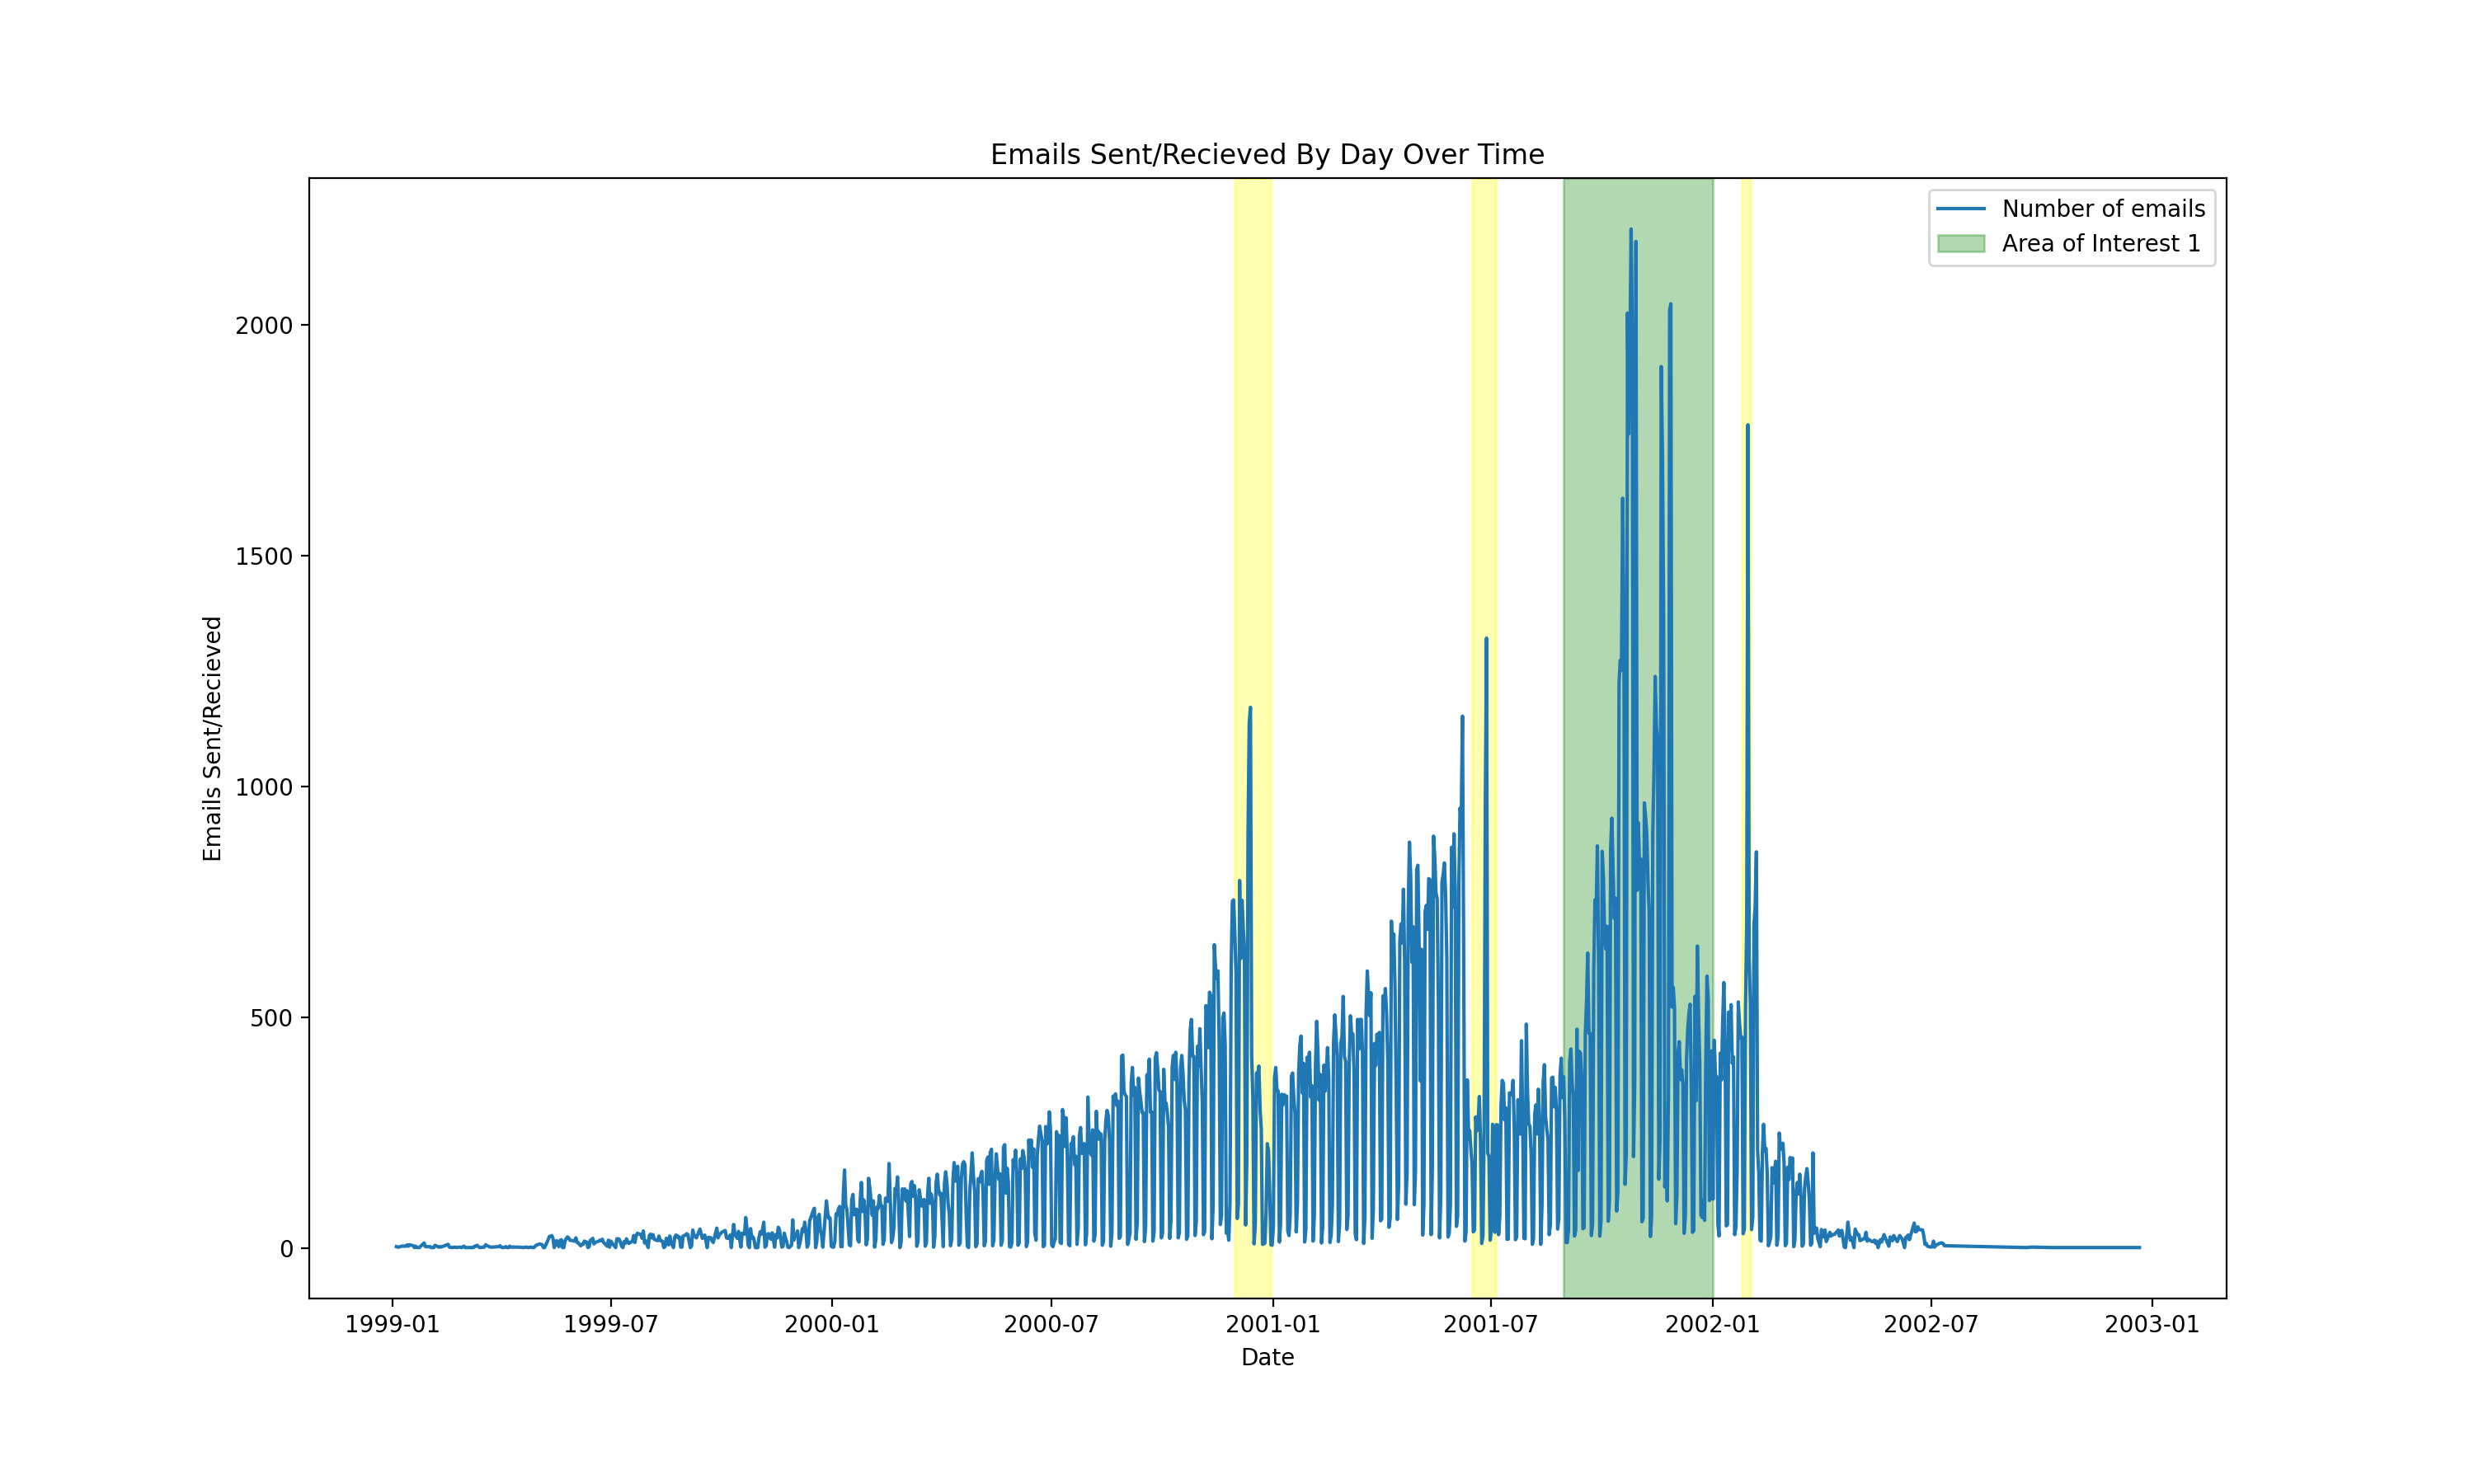

In [84]:
##Ref How to Recall Saved Image: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
image = Image.open('datetimeseries.png')
image

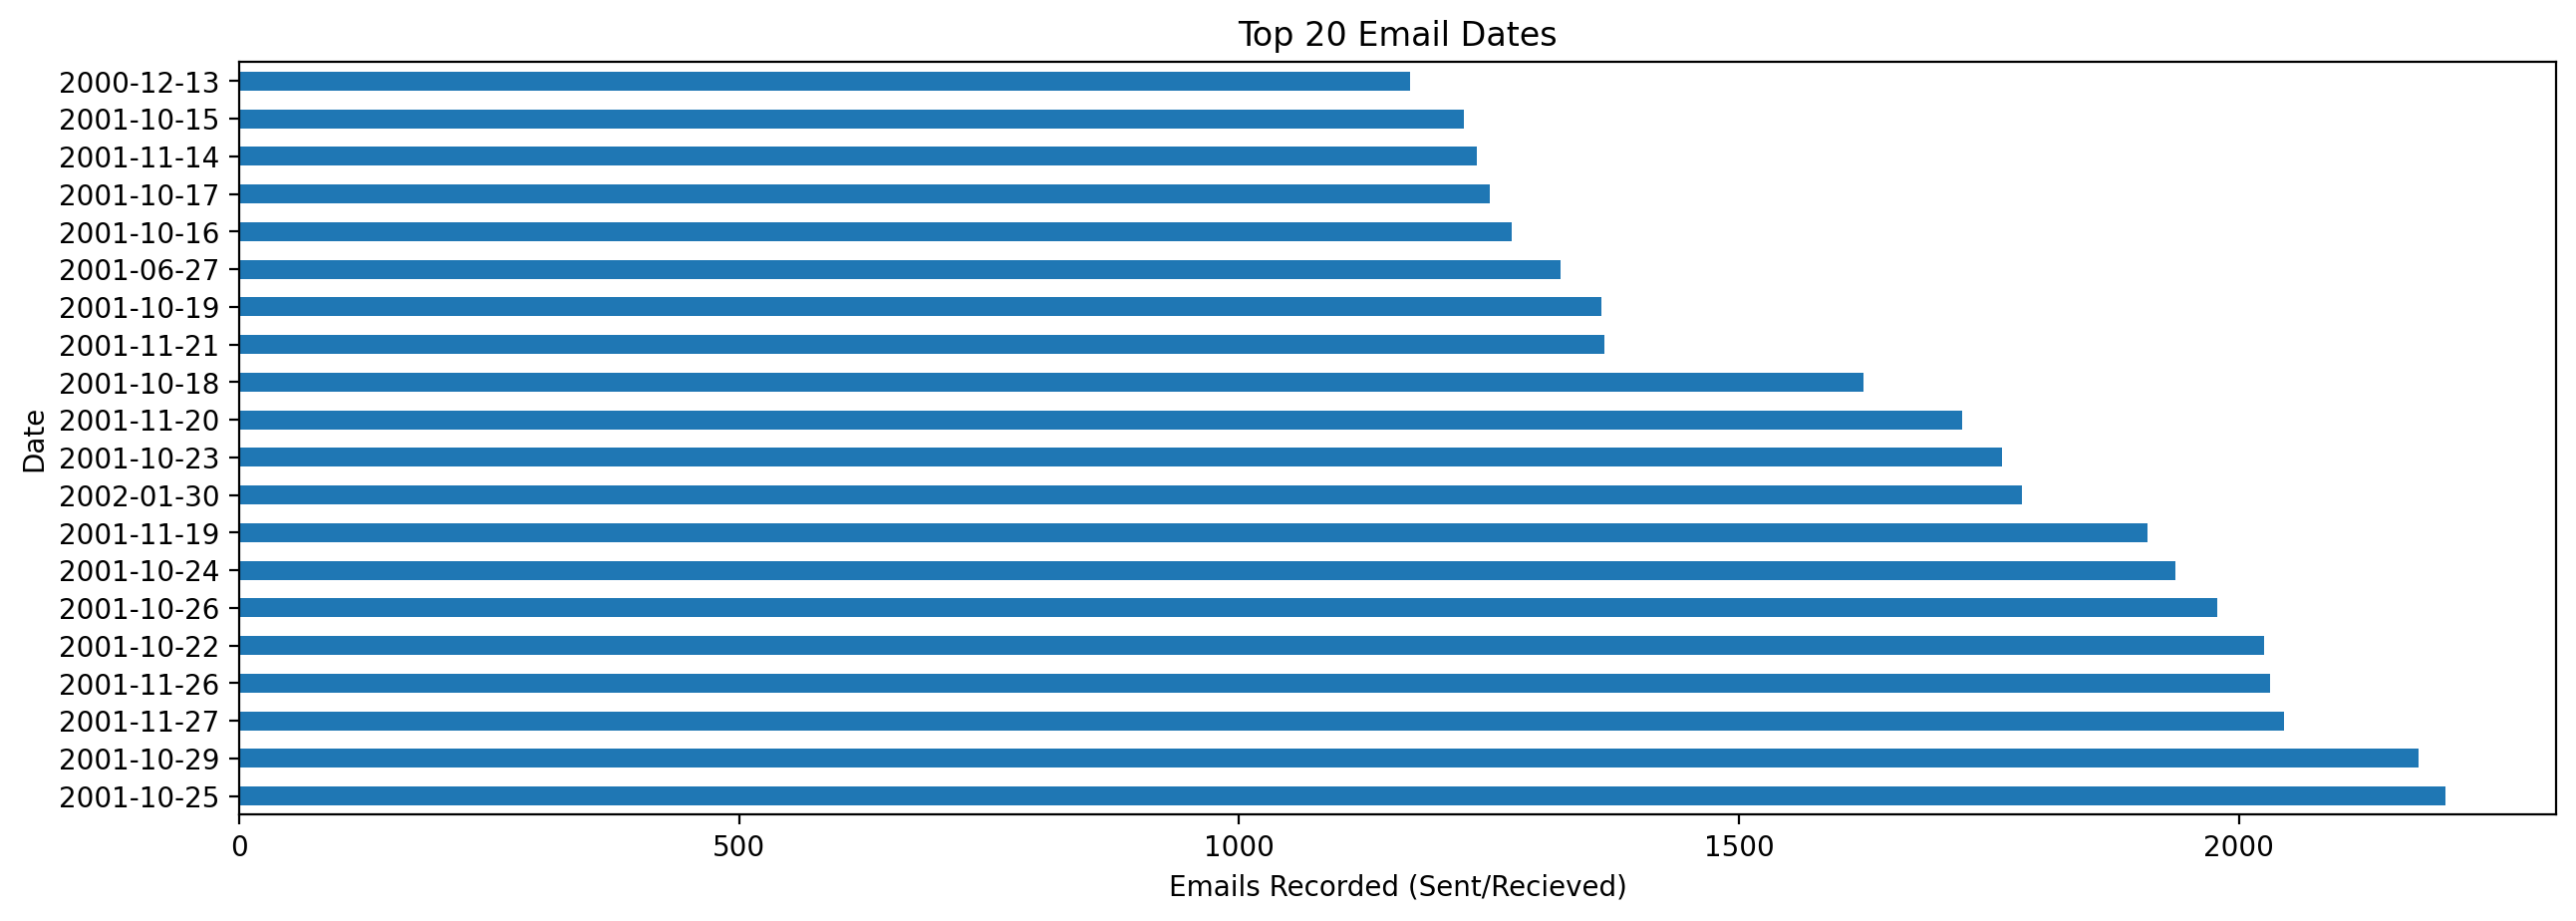

In [43]:
image = Image.open('top20dates.png')
image

### Emails By Email Address

Another key indicatior of analysias that can be relatred to comapny emails is the email adresses that had the highest number of emails sent to or recived from. This will assists in detemrining some of the peoiple who where most active within the comapny, and therefore may have been aware of fraudulent activities occuring.

From the data/graphs below we can determing the following 10 peoples emails had the highest email traffic through the period of the given data:

1. jeff.dasovich@enron.com          6273
2. j.kaminski@enron.com             5838
3. kay.mann@enron.com               5100
4. sara.shackleton@enron.com        4797
5. tana.jones@enron.com             4437
6. chris.germany@enron.com          3686
7. no.address@enron.com             3511
8. enron.announcements@enron.com    2838
9. matthew.lenhart@enron.com        2784
10. debra.perlingiere@enron.com     2549

I have also researched the relevant emails roles within the company, as this could provide furthur insight into email traffic.

1. jeff.dasovich@enron.com          government relations executive
2. j.kaminski@enron.com             Managing Director for Research
3. kay.mann@enron.com               head of legal
4. sara.shackleton@enron.com        unknown
5. tana.jones@enron.com             Internal communications
6. chris.germany@enron.com          Unknown
7. no.address@enron.com             Unknown
8. enron.announcements@enron.com    Announcements Email
9. matthew.lenhart@enron.com        trading
10. debra.perlingiere@enron.com     Legal department

Following this is a Treemap, allowing for another visual representation of email adresseses within Enron and the size of their importance.

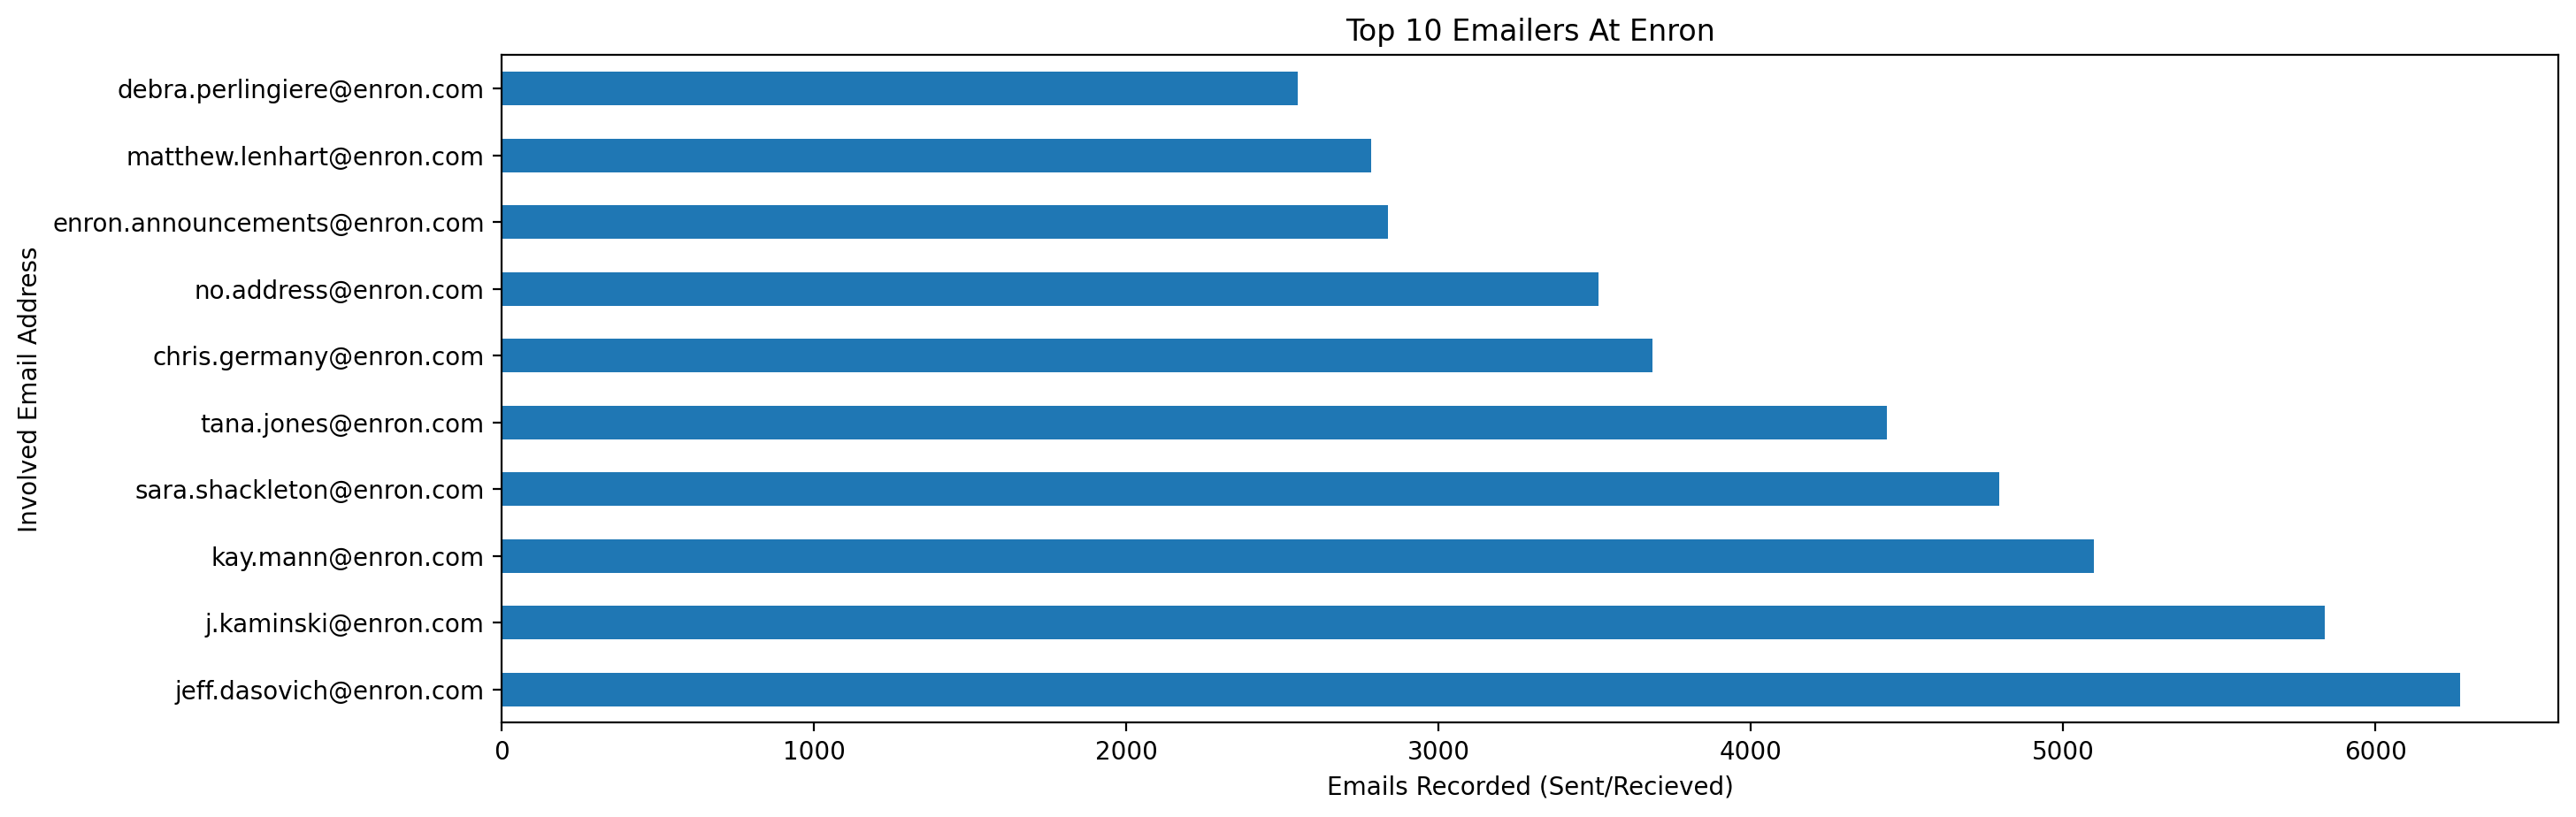

In [44]:
image = Image.open('emailers1.png')
image

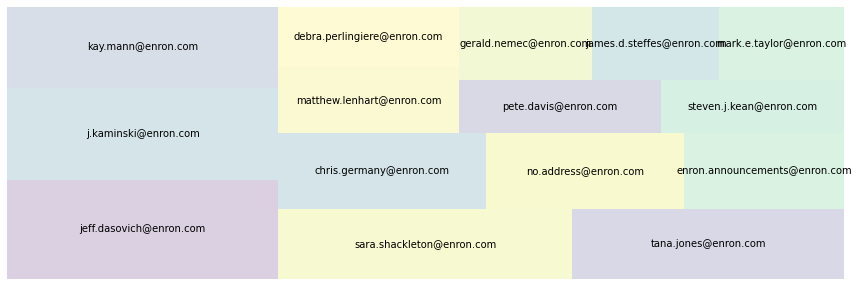

In [45]:
#Define the treemap parameters, data, axis.
## Ref: https://www.python-graph-gallery.com/treemap/
squarify.plot(sizes=dftreemap['Count'], label=dftreemap['Sender'], alpha=0.2 )
plt.axis('off')
plt.show()

# Conclusion

In conclusion, byu using Pyhton to enable data anaslystics we can egenrate detailed analysis of given data. In a world that is constatntly shifting towards the digital workplace, data analysis like this becomes increasingly frequent in criminal and civil law cases. 

In the case of Enrons frad scandal, we can now presume a period of mass email activity between Octover and November of 2001, not long before the companies fall. We can also determine from the emailers list, that many of the top emailers sat in high positions such as managers or key people from the legal team.

# References